# EDA - Instagram Cyberbullying Comments Dataset
Exploratory Data Analysis for Instagram cyberbullying comments dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.feature_extraction.text import CountVectorizer

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

## Load Dataset

In [2]:
df = pd.read_csv("./dataset_komentar_instagram_cyberbullying.csv")
print(f"  Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"  Columns: {list(df.columns)}")
df.head()

  Shape: 400 rows × 3 columns
  Columns: ['Id', 'Sentiment', 'Instagram Comment Text']


,Id,Sentiment,Instagram Comment Text
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."


## Dataset Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      400 non-null    int64 
 1   Sentiment               400 non-null    object
 2   Instagram Comment Text  400 non-null    object
dtypes: int64(1), object(2)
memory usage: 9.5+ KB


In [4]:
df.describe()

,Id
count,400.000000
mean,200.500000
std,115.614301
min,1.000000
25%,100.750000
50%,200.500000
75%,300.250000
max,400.000000


## Sentiment Distribution

In [5]:
print("Sentiment value counts:")
print(df['Sentiment'].value_counts())
print("\nSentiment percentage:")
print(df['Sentiment'].value_counts(normalize=True) * 100)

Sentiment value counts:
Sentiment
negative    200
positive    200
Name: count, dtype: int64

Sentiment percentage:
Sentiment
negative    50.0
positive    50.0
Name: proportion, dtype: float64


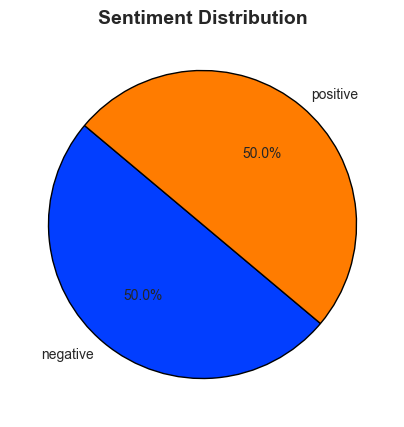

In [6]:
colors = sns.color_palette("bright", n_colors=len(df['Sentiment'].unique()))

plt.figure(figsize=(5, 5))
plt.pie(df['Sentiment'].value_counts(), 
        labels=df['Sentiment'].value_counts().index, 
        autopct='%1.1f%%', 
        colors=colors, 
        startangle=140, 
        wedgeprops={'edgecolor': 'black'})
    
plt.title("Sentiment Distribution", fontsize=14, fontweight='bold')
plt.show()

## Text Analysis

In [7]:
print("Missing values:")
print(df.isnull().sum())
print("\nEmpty strings:")
df['Instagram Comment Text'] = df['Instagram Comment Text'].fillna('')
print(df[df['Instagram Comment Text'] == ''].count())

Missing values:
Id                        0
Sentiment                 0
Instagram Comment Text    0
dtype: int64

Empty strings:
Id                        0
Sentiment                 0
Instagram Comment Text    0
dtype: int64


In [8]:
df.dropna(subset=['Instagram Comment Text'], inplace=True)
df = df[df['Instagram Comment Text'] != ''].copy()
print(f"Dataset shape after cleaning: {df.shape}")

Dataset shape after cleaning: (400, 3)


## Text Length Analysis

In [9]:
df['length'] = df['Instagram Comment Text'].str.len()
df.head(5)

,Id,Sentiment,Instagram Comment Text,length
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...,211
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......,116
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...,140
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ...",369
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...",123


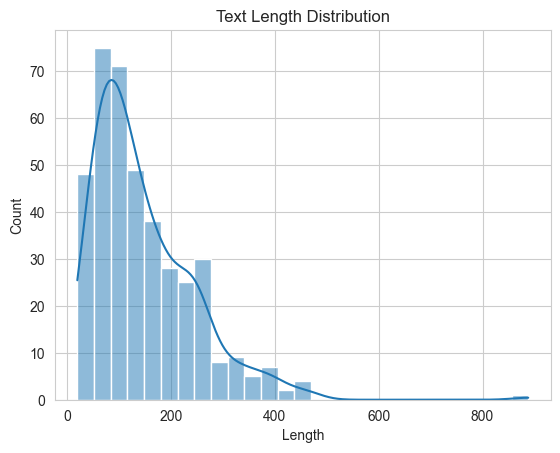

In [10]:
sns.histplot(df['length'], kde=True)
plt.xlabel('Length')
plt.title('Text Length Distribution')
plt.show()

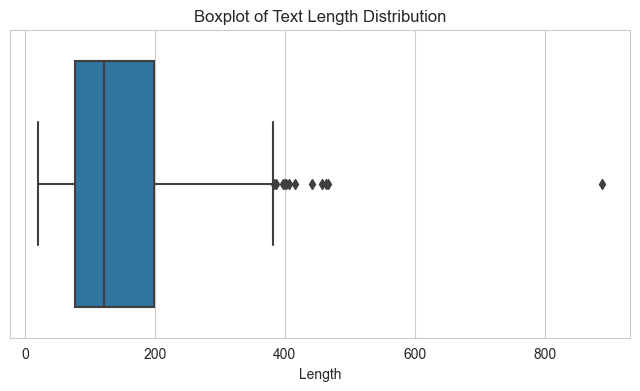

In [11]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['length'])
plt.xlabel('Length')
plt.title('Boxplot of Text Length Distribution')
plt.show()

In [12]:
length = df['length']
print(f"Mean: {length.mean():.2f}")
print(f"Median: {length.median():.2f}")
print(f"Std Dev: {length.std():.2f}")
print(f"Min: {length.min()}")
print(f"Max: {length.max()}")
print(f"\nTexts shorter than 20 characters: {df[df['length'] < 20].shape[0]}")

Mean: 147.86
Median: 121.00
Std Dev: 99.56
Min: 20
Max: 888

Texts shorter than 20 characters: 0


## Text Length by Sentiment

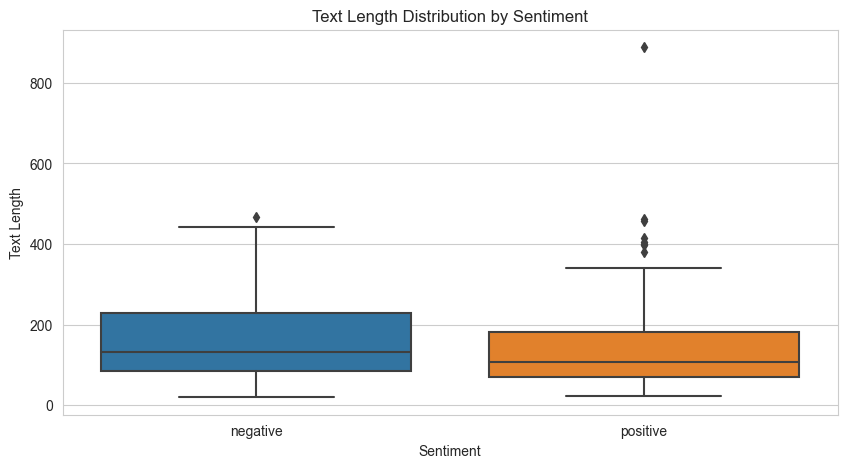

In [13]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Sentiment', y='length', data=df)
plt.title('Text Length Distribution by Sentiment')
plt.ylabel('Text Length')
plt.show()

## N-gram Analysis

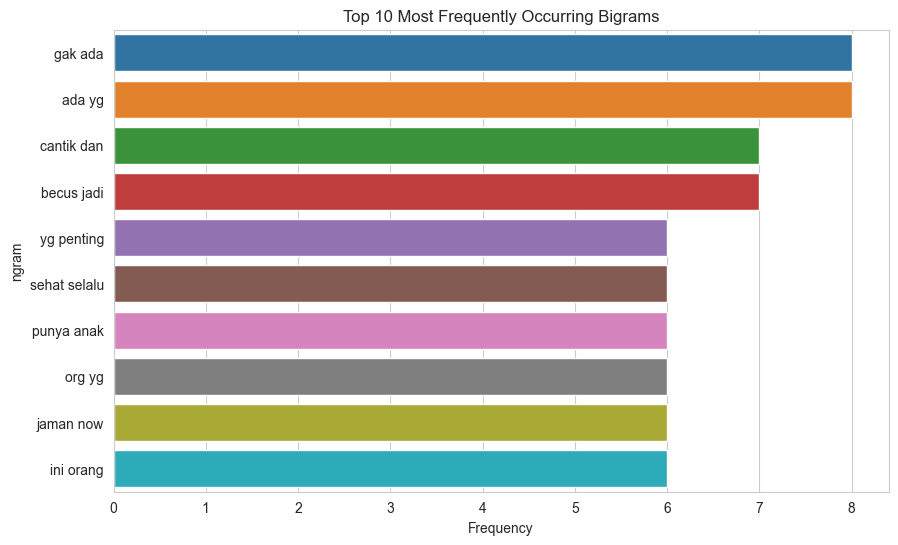

In [14]:
# bigram
cv = CountVectorizer(ngram_range=(2,2), max_features=100)
bigrams = cv.fit_transform(df['Instagram Comment Text'])

count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse=True))
ngram_freq.columns = ["frequency", "ngram"]

plt.figure(figsize=(10, 6))
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occurring Bigrams')
plt.xlabel('Frequency')
plt.show()

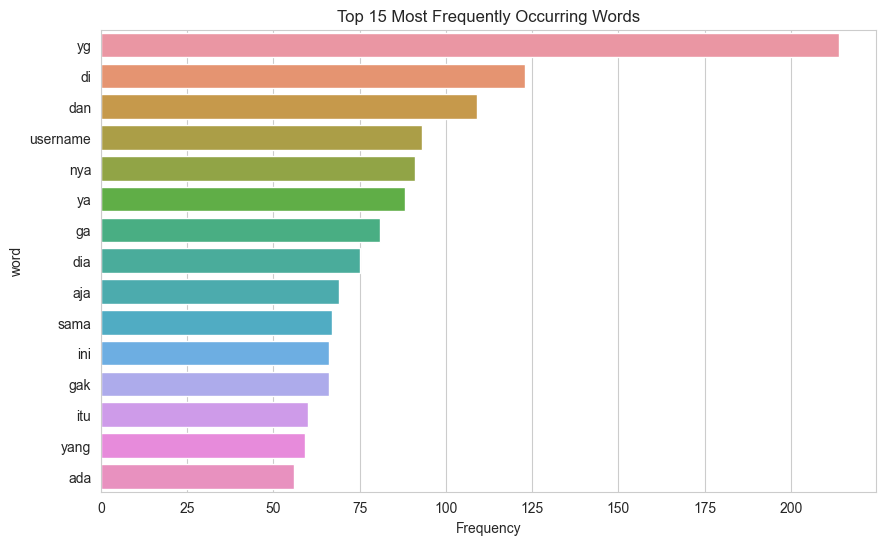

In [15]:
# unigram
cv_unigram = CountVectorizer(ngram_range=(1,1), max_features=100)
unigrams = cv_unigram.fit_transform(df['Instagram Comment Text'])

count_values_uni = unigrams.toarray().sum(axis=0)
unigram_freq = pd.DataFrame(sorted([(count_values_uni[i], k) for k, i in cv_unigram.vocabulary_.items()], reverse=True))
unigram_freq.columns = ["frequency", "word"]

plt.figure(figsize=(10, 6))
sns.barplot(x=unigram_freq['frequency'][:15], y=unigram_freq['word'][:15])
plt.title('Top 15 Most Frequently Occurring Words')
plt.xlabel('Frequency')
plt.show()

## N-gram Analysis by Sentiment

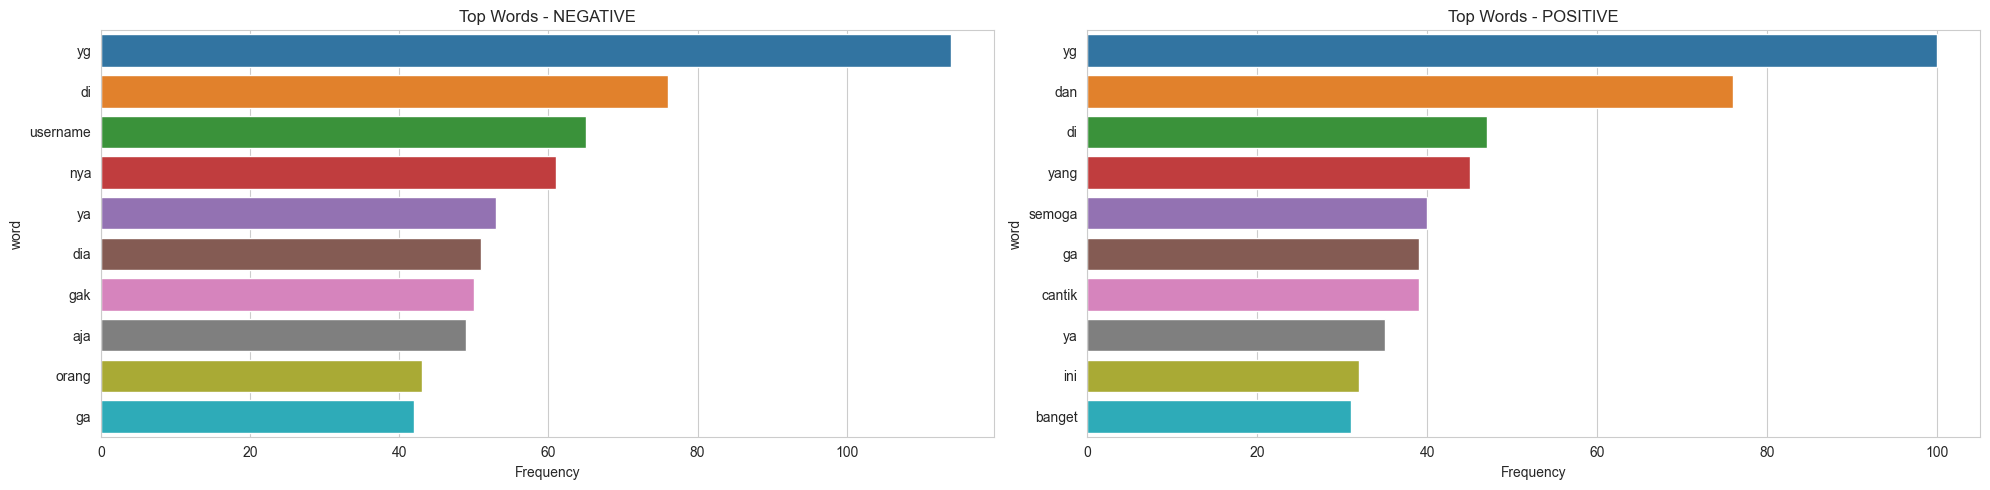

In [17]:
# top words per sentiment
sentiments = df['Sentiment'].unique()

fig, axes = plt.subplots(1, len(sentiments), figsize=(20, 5))
if len(sentiments) == 1:
    axes = [axes]

for idx, sentiment in enumerate(sentiments):
    sentiment_texts = df[df['Sentiment'] == sentiment]['Instagram Comment Text']
    
    cv_sent = CountVectorizer(ngram_range=(1,1), max_features=50)
    words_sent = cv_sent.fit_transform(sentiment_texts)
    
    count_vals = words_sent.toarray().sum(axis=0)
    word_freq = pd.DataFrame(sorted([(count_vals[i], k) for k, i in cv_sent.vocabulary_.items()], reverse=True))
    word_freq.columns = ["frequency", "word"]
    
    sns.barplot(x=word_freq['frequency'][:10], y=word_freq['word'][:10], ax=axes[idx])
    axes[idx].set_title(f'Top Words - {sentiment.upper()}')
    axes[idx].set_xlabel('Frequency')

plt.tight_layout()
plt.show()

## Summary Statistics

In [16]:
print("=" * 50)
print("DATASET SUMMARY")
print("=" * 50)
print(f"Total samples: {len(df)}")
print(f"\nSentiment distribution:")
for sentiment, count in df['Sentiment'].value_counts().items():
    percentage = (count / len(df)) * 100
    print(f"  {sentiment}: {count} ({percentage:.2f}%)")
print(f"\nText length statistics:")
print(f"  Average length: {df['length'].mean():.2f} characters")
print(f"  Median length: {df['length'].median():.2f} characters")
print(f"  Shortest text: {df['length'].min()} characters")
print(f"  Longest text: {df['length'].max()} characters")
print("=" * 50)

DATASET SUMMARY
Total samples: 400

Sentiment distribution:
  negative: 200 (50.00%)
  positive: 200 (50.00%)

Text length statistics:
  Average length: 147.86 characters
  Median length: 121.00 characters
  Shortest text: 20 characters
  Longest text: 888 characters
